# Training A Classifier

Here I follow the pyTorch [tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-convolutional-neural-network) on a Convolutional Neural Network for image classification.

## import.STONKS()

Ya know da drill:

In [2]:
import torch
import torchvision
from torchvision import transforms
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

## DATA
First we need some data wich we can download with Torch.

This data needs to be normalized!

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root="./datasetCIFAR", train=True, download=True, transform=transform
    )

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
    )

testset = torchvision.datasets.CIFAR10(
    root="./datasetCIFAR", train=False, download=True, transform=transform
    )

testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size,shuffle=False, num_workers=2
    )

classes = ("plane", "car", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck")

Files already downloaded and verified
Files already downloaded and verified


## Show some images

Because we have done it so much now. It has just become tradition. We need to see some of dem images!

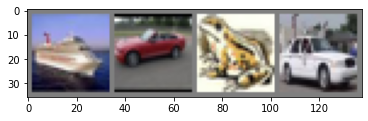

ship  car   frog  car  


In [4]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
# The "iter( )" function makes an object iterable.
# Meaning that we still can't subscribt it, however we can call the next 
# "instance" (I guess is an apt name), over and over. 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

## Defining neural network
The neural network obviously needs to be defined.
So here we see an example on how to define a Convolutional Neural Network (CNN).

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # I am quite certain that 
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = CNN()

## Defining loss and optimizer

We also need to define an optimizer (function) and a loss (function). Business as usual.

In [6]:
lrn_rt = 0.5e-3

# I am unsure as to why loss is called criterion here
loss_fn = nn.CrossEntropyLoss()
# We are just going to use Adam, because it has proven to be effective.
optimizer = optim.Adam(model.parameters(), lr=lrn_rt)

## The Training and Testing Loop

The loops for training and testing:

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, data in enumerate(dataloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # Compute prediction and loss
        pred = model(inputs)
        loss = loss_fn(pred, labels)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10000 == 0:
            loss, current = loss.item(), batch * len(inputs)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for data in dataloader:
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
        
            pred = model(inputs)
            test_loss += loss_fn(pred, labels).item()
            correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
    return 100*correct, test_loss

## Training the network

Obviously we also need to fit some weights, so here is the code for training the network.

In [8]:
epochs = 10
accuracies = [0]*epochs
losses = [0]*epochs

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader, model, loss_fn, optimizer)
    accuracy, avgloss = test_loop(testloader, model, loss_fn)
    
    # This is just extra for plotting
    accuracies[t] = accuracy
    losses[t] = avgloss
print("Done!")



Epoch 1
-------------------------------


KeyboardInterrupt: 

### Optional code for plotting
If you wanna see the development of the accuracy and the avg loss, this is the plot for you!

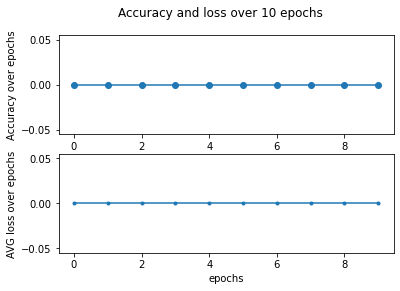

In [9]:
xVals = list(range(epochs))

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle(f"Accuracy and loss over {epochs} epochs")

ax1.plot(xVals, accuracies, 'o-')
ax2.set_xlabel("epochs")
ax1.set_ylabel("Accuracy over epochs")

ax2.plot(xVals, losses, '.-')
ax2.set_xlabel("epochs")
ax2.set_ylabel("AVG loss over epochs")

plt.show()

### A quick save
Saving the model real quick

In [10]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

## Testing the newtork on the Test data

Pretty much what it says. We are always interested in testing the model on some random testing data.


shape of the images 'Tensor': torch.Size([4, 3, 32, 32])


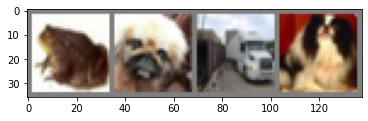

GroundTruth:  frog  dog   truck dog  


In [15]:
images, labels = dataiter.next()

print(f"shape of the images 'Tensor': {images.shape}")
# print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join(f"{classes[labels[j]]:5s}" for j in range(4)))

Loading the model back in (if necessary)

In [12]:
net = CNN()
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

The scores from the newtork

In [16]:
outputs = net(images)

How it predicts

In [17]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join(f"{classes[predicted[j]]:5s}" for j in range(4)))

Predicted:  ship  ship  ship  ship 


## SUS code and questions

I do not understand why the testset looks so different from the test loader. The test loader seems to an object created from the "test-dataset". 
The main difference between the two seems to solely be that, the "test-dataset" is a subscribtable object, wheras the "test-dataloader" isn't.

The following code shows four random pictures from the testset and also the four next picture from the testloader.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


random index: tensor([2418, 3411, 6938,  436])
number of data points: 10000


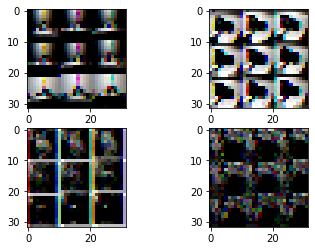

In [ ]:
N_DataPoints = len(testset)
sample_idx = torch.randint(N_DataPoints, size=(4,))
print(f"random index: {sample_idx}")
print(f"number of data points: {N_DataPoints}")

fig = plt.figure()
for i, indx in enumerate(sample_idx):
    indx = indx.item()
    #print(indx)
    
    ax = fig.add_subplot(2, 2, i + 1)
    tensor_im = testset[indx][0]
    #print(f"Shape of im before reshape: {tensor_im.shape}")
    reshaped_im = tensor_im.view(tensor_im.shape[1], tensor_im.shape[2], tensor_im.shape[0])
    #print(f"Shape of im after reshape: {reshaped_im.shape}")
    imgplot = plt.imshow(reshaped_im)

shape of the images 'Tensor': torch.Size([4, 3, 32, 32])


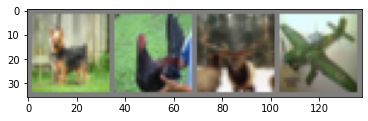

GroundTruth:  dog   bird  deer  plane


In [ ]:
images, labels = dataiter.next()

print(f"shape of the images 'Tensor': {images.shape}")
# print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join(f"{classes[labels[j]]:5s}" for j in range(4)))

## Note on Code for Training

So I spent a good amount of time examning theese two different examples of code. In short: ...They do the same.

I prefer the first one, as it is nicer formatted and it has bit more information. The weird thing is that they are both from pyTorch's tutorial sites.

In [ ]:
"""
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, data in enumerate(dataloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader, model, loss_fn, optimizer)
    test_loop(testloader, model, loss_fn)
print("Done!")
"""

In [ ]:
"""
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
"""